**K Nearest Neighbor**

**Q0**
1. Regression predicts continuous numerical values while classification predicts discrete categorical variables. 
2. A confusion matrix is a table for classification models showing the actual and predicted values of a model. A predicted versus actual outcomes are compared returning true positive, false positive, true negative, false negative. This helps us understand the accuracy of the model in how accurately it predicts categorical variables.
3. The Sum of Squared Error calculates the squared distance between the regression line and data points and adds them together, calculating the accuracy of the model. The larger the number the more innacurate the model is.
4. Overfitting is where the trend line too closely matches the training set, meaning that a trend cannot be meaningfully predicted on a test set since the model will only represent the testing data. Underfitting is the opposite, where the model does not correlate with the data points meaning that no trend can be meaningfully predicted.
5. Splitting into training and testing sets allow us to first create our model with the training set and also compare it to similar data with the testing set (since they both come from the same dataset). If we didn't split the dataset then we wouldn't have a similar data set to compare the model to, meaning we wouldn't know if the model is accurate to population or not. Your k value and SSE will not appropriately match the population
6. reporting a class label as a prediction will introduce true positives and false postiives, meaning that you can parse trends more easily, however it cannot predict deeper trends, meaning the results can potentially be underfit and not representative of the population. Because of the confusion matrix, this is resistant to outliers. reporting as a class distribution over class labels will better display trends, but it'll not be as resistant to outliers.

**Q4**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('land_mines.csv')
data

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


<Axes: xlabel='mine_type', ylabel='voltage'>

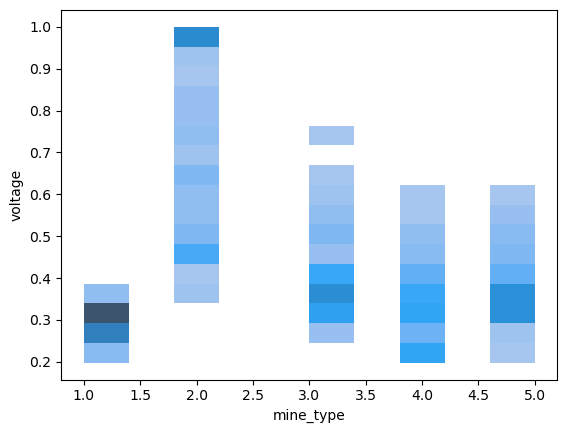

In [5]:
sns.histplot(data = data, x = "mine_type", y = "voltage")

<Axes: xlabel='mine_type', ylabel='height'>

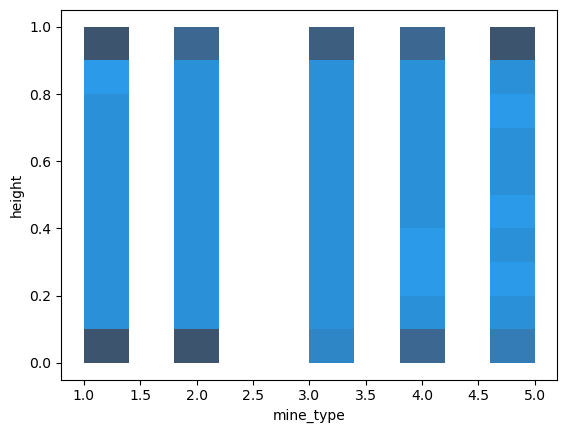

In [6]:
sns.histplot(data = data, x = "mine_type", y = "height")

<Axes: xlabel='height', ylabel='soil'>

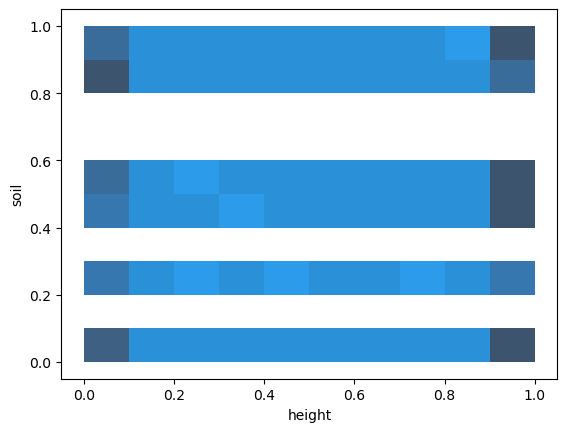

In [8]:
sns.histplot(data = data, x = "height", y = "soil")

sorry kids if you run into a mine the NSA did not give good data

In [75]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data['mine_type'], data["voltage"], test_size = 0.5, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[3. 5. 4. 5. 1. 3. 4. 1. 3. 2. 5. 3. 2. 1. 2. 3. 3. 2. 5. 3. 5. 1. 1. 4.
 2. 1. 2. 5. 2. 4. 1. 1. 1. 4. 4. 1. 3. 5. 2. 3. 3. 4. 5. 3. 1. 2. 4. 5.
 3. 1. 5. 4. 3. 4. 1. 4. 3. 4. 3. 1. 5. 3. 5. 5. 3. 4. 3. 1. 5. 2. 4. 2.
 2. 3. 1. 5. 5. 4. 1. 2. 2. 1. 1. 1. 3. 1. 2. 4. 3. 4. 2. 3. 3. 1. 2. 1.
 4. 1. 4. 3. 5. 4. 1. 5. 5. 5. 2. 5. 4. 2. 5. 4. 1. 5. 5. 2. 3. 2. 1. 2.
 2. 5. 1. 2. 2. 2. 2. 1. 1. 2. 3. 4. 5. 3. 5. 1. 2. 2. 4. 5. 5. 5. 4. 2.
 2. 1. 2. 1. 4. 4. 3. 5. 3. 2. 4. 4. 3. 4. 3. 2. 5. 3. 5. 1. 5. 2. 3. 2.
 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 3)
#I chose 3 because there are only 5 types of mines, not sure how helpful an elbow plot would be with such a small range of data.
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Expected 2D array, got 1D array instead:
array=[3 5 4 5 1 3 4 1 3 2 5 3 2 1 2 3 3 2 5 3 5 1 1 4 2 1 2 5 2 4 1 1 1 4 4 1 3
 5 2 3 3 4 5 3 1 2 4 5 3 1 5 4 3 4 1 4 3 4 3 1 5 3 5 5 3 4 3 1 5 2 4 2 2 3
 1 5 5 4 1 2 2 1 1 1 3 1 2 4 3 4 2 3 3 1 2 1 4 1 4 3 5 4 1 5 5 5 2 5 4 2 5
 4 1 5 5 2 3 2 1 2 2 5 1 2 2 2 2 1 1 2 3 4 5 3 5 1 2 2 4 5 5 5 4 2 2 1 2 1
 4 4 3 5 3 2 4 4 3 4 3 2 5 3 5 1 5 2 3 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
#not sure what went wrong because y_pred is defined and I know the syntax for all of the previous conde is correct. 
#What I would expect to see is that the model is not going to accurately predict the type of mine, seeing how all of the graphs
#I previously created clearly demonstrated there is little differentiation between each mine aside from voltage.

NameError: name 'y_pred' is not defined

For this model I would suggest that they look at the clusters rather than the prediction, I personally would not have a lot of confidence in this model, and for something serious like this, I would not trust it given the high likelihood of error.

**Q1**

In [19]:
college = pd.read_csv('college_completion.csv')

In [35]:
college.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [23]:
college.shape

(3798, 63)

2. 63 variables, 3798 observations

In [25]:
cross_tab = pd.crosstab(college['control'], college['level'])
print(cross_tab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Most people who complete 2 years of college do so at a public school, the majority of the remainder do so at a private for profit school. Those who complete a 4 year degree primarily do so at a private not for profit school with the other half split between the other two categories. More people complete four years than only 2.

<Axes: xlabel='grad_100_value', ylabel='Count'>

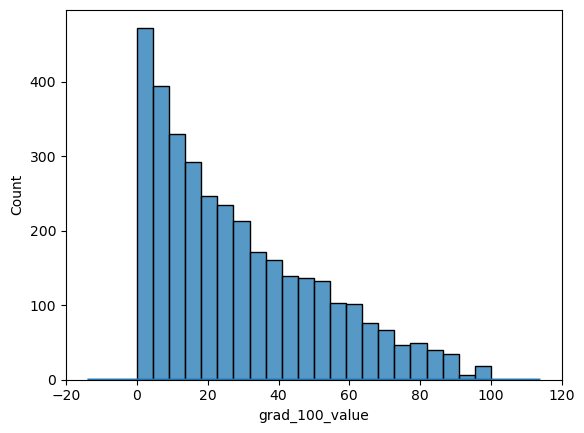

In [27]:
sns.histplot(data = college, x = "grad_100_value")
sns.kdeplot(data = college,x = "grad_100_value")

<Axes: xlabel='grad_100_value', ylabel='Density'>

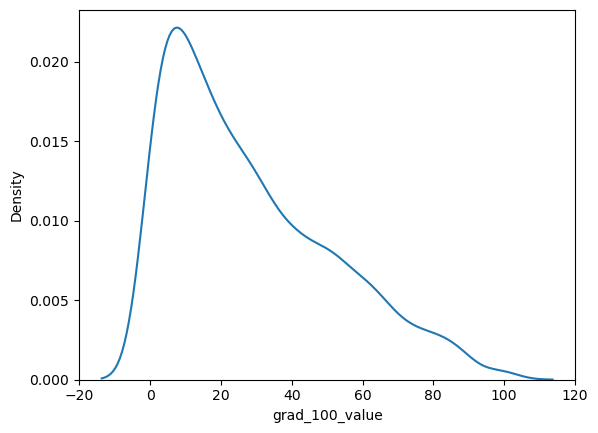

In [28]:
sns.kdeplot(data = college,x = "grad_100_value")

<Axes: xlabel='grad_100_value'>

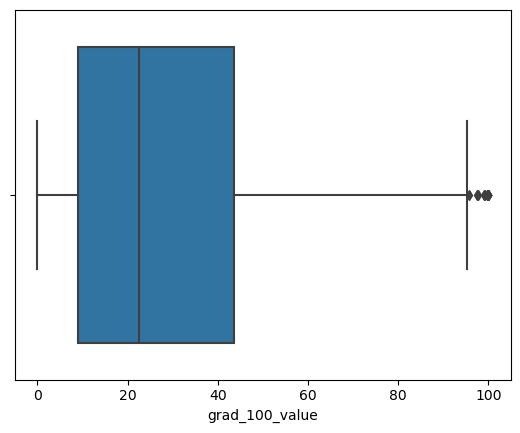

In [29]:
sns.boxplot(data = college, x = "grad_100_value")

In [30]:
college.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


<Axes: xlabel='grad_100_value', ylabel='Density'>

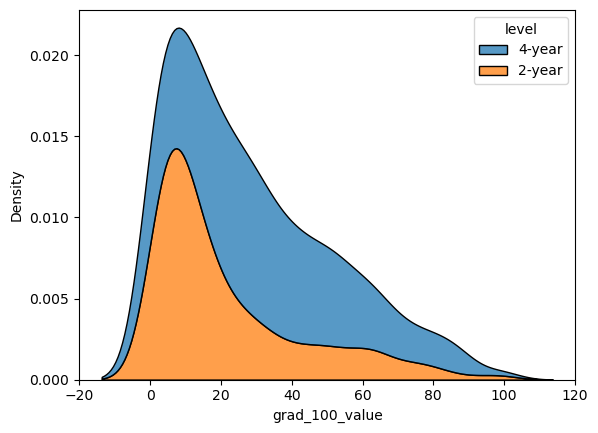

In [64]:
sns.kdeplot(data = college, x = "grad_100_value", hue = 'level', multiple = 'stack', fill = True)

<Axes: xlabel='grad_100_value', ylabel='Density'>

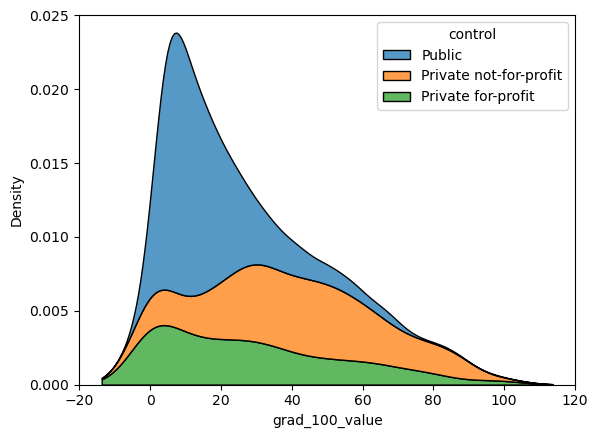

In [65]:
sns.kdeplot(data = college, x = "grad_100_value", hue = 'control', multiple = 'stack', fill = True)

4 year public schools have the highest graduation rate.

<Axes: xlabel='aid_value', ylabel='Density'>

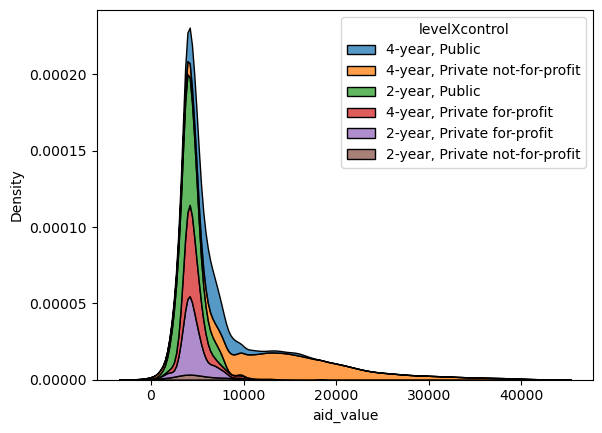

In [56]:
college['levelXcontrol'] = college['level']+', '+ college['control']
sns.kdeplot(data=college, x='aid_value', hue = "levelXcontrol",multiple='stack', fill = True)

Confused on the question because it's leading towards asking about aid value by school and not graduation rate so I'm going to answer what the graph displays. In this case, 4 year not for profit private schools give the highest amount of financial aid. 4 year public schools give the most consistent amount of financial aid.

index                                   \
                                count         mean          std    min   
level  control                                                           
2-year Private for-profit       465.0  2604.780645  1106.442974   40.0   
       Private not-for-profit    68.0  2202.352941   887.024386  147.0   
       Public                   926.0  1569.205184  1004.849540    6.0   
4-year Private for-profit       527.0  2643.506641  1201.064976   12.0   
       Private not-for-profit  1180.0  1669.577119   915.147558    2.0   
       Public                   632.0  1634.821203   914.388766    0.0   

                                                                 unitid  \
                                   25%     50%      75%     max   count   
level  control                                                            
2-year Private for-profit      2108.00  3126.0  3453.00  3796.0   465.0   
       Private not-for-profit  1675.75  2326.5  3091.75  3549.0    68.0   
       Public                   708.25  1507.0  2498.75  3792.0   926.0   
4-year Private for-profit      1681.00  3238.0  3554.50  3797.0   527.0   
       Private not-for-profit   892.75  1669.5  2413.25  3794.0  1180.0   
       Public                   841.75  1641.0  2381.25  3688.0   632.0   

                                              ... carnegie_ct         \
                                        mean  ...         75%    max   
level  control                                ...                      
2-year Private for-profit      313171.550538  ...       517.0  517.0   
       Private not-for-profit  250229.470588  ...        73.0  517.0   
       Public                  190147.817495  ...       289.0  289.0   
4-year Private for-profit      327677.552182  ...       343.0  517.0   
       Private not-for-profit  194489.574576  ...       343.0  517.0   
       Public                  186217.174051  ...       386.0  386.0   

                              cohort_size                                 \
                                    count         mean          std  min   
level  control                                                             
2-year Private for-profit           461.0   350.559653   831.927335  3.0   
       Private not-for-profit        68.0   159.882353   171.968891  1.0   
       Public                       926.0   797.755940   829.101262  2.0   
4-year Private for-profit           318.0   105.396226   235.219946  1.0   
       Private not-for-profit      1121.0   398.231936   459.528355  1.0   
       Public                       573.0  1555.342059  1497.792586  1.0   

                                                                 
                                  25%     50%      75%      max  
level  control                                                   
2-year Private for-profit       69.00   193.0   408.00  16229.0  
       Private not-for-profit   23.75    86.0   294.25    591.0  
       Public                  306.25   544.5  1026.25  13104.0  
4-year Private for-profit       10.00    31.0   118.75   3240.0  
       Private not-for-profit  113.00   288.0   507.00   4157.0  
       Public                  479.00  1038.0  2105.00   8025.0  

[6 rows x 408 columns]

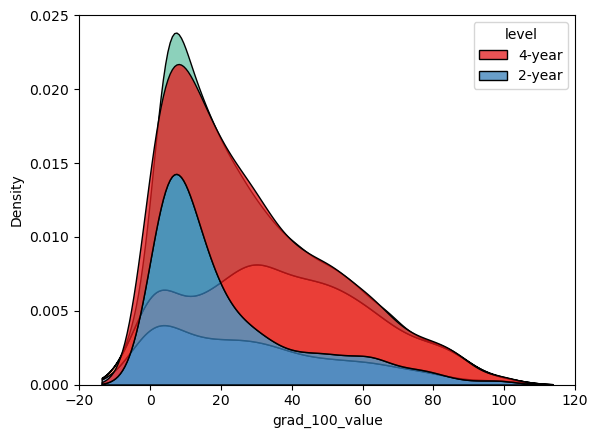

In [52]:
sns.kdeplot(data=college, x='grad_100_value', hue='control', multiple='stack', fill=True, palette='Set2')
sns.kdeplot(data=college, x='grad_100_value', hue='level', multiple='stack', fill=True, palette='Set1')

college.groupby(['level', 'control']).describe()

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

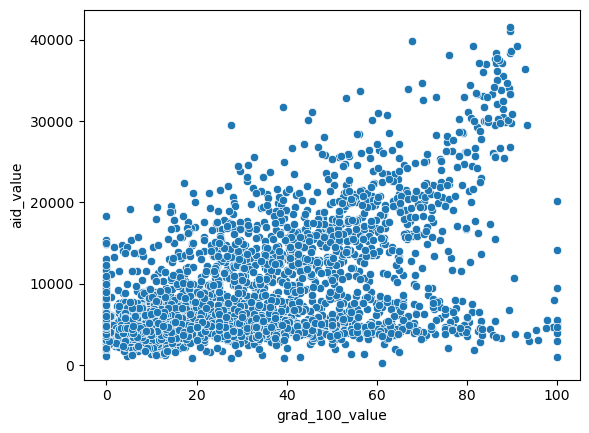

In [58]:
sns.scatterplot(data = college, x = "grad_100_value", y = "aid_value")

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

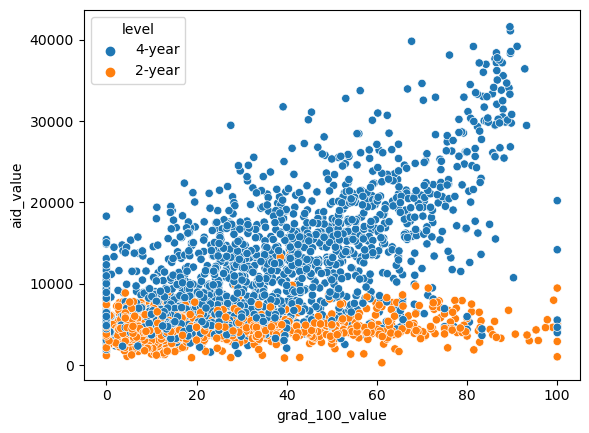

In [59]:
sns.scatterplot(data = college, x = "grad_100_value", y = "aid_value", hue = "level")

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

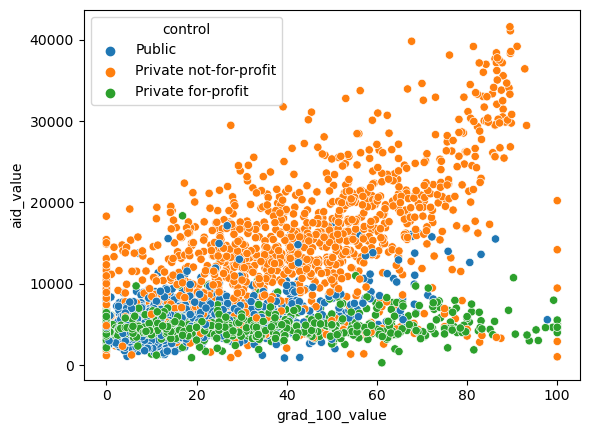

In [60]:
sns.scatterplot(data = college, x = "grad_100_value", y = "aid_value", hue = "control")

4 year programs that have the highest graduation rates tend to give the most in financial aid. These schools are predominantly private, not for profit schools. for 2 year schools and private for profit schols aid does not seem to affect graduation rate.